# Numerical Simulation Laboratory

## Numerical exercise 1 
La cartella contiene i vari files organizzati nelle seguenti cartelle:
- <font color='red'>**Code**</font>: contiene il codice dei tre esercizi: ogni file è compilabile attraverso il comando *nome_file.exe*.
- **<font color='red'>Files</font>**: contiene i files di output contenenti i dati necessari per costruire i grafici.
- **<font color='red'>Pictures</font>**: contiene eventuali immagini riportate nel notebook.

Il codice è stato organizzato nel seguente modo:
- <font color='red'>*exercise_1.cpp*</font> codice relativo all'esercizio 01.1: stima del valore medio, della varianza e del $\chi^2$ per una distribuzione uniforme di valori casuali.
- <font color='red'>*exercise_2.cpp*</font> codice relativo all'esercizio 01.2: generazione degli istogrammi per la variabile $S_N$ ottenuta a partire da valori distribuiti con probabilità uniforme, esponenziale e lorentziana.
- <font color='red'>*exercise_3.cpp*</font> codice relativo all'esercizio 01.3: stima del valore di $\pi$ attraverso l'esperimento dell'ago di Buffon.
- <font color='red'>*random.cpp*</font> contiene il codice necessario per la generazione di numeri casuali.
- <font color='red'>*statistics.cpp*</font> contiene la definizione di alcune funzione utilizzate trasversalmente nei tre esercizi per le stime dei valori medi e delle incertezze statistiche.

### Exercise 01.1
Test del generatore di numeri casuali attraverso la stima dei seguenti indicatori statistici:

1.  <span style='color:blue'> **Valore medio** </span> di una successione di numeri casuali $\langle r \rangle = \int_0^1 r dr = 1/2$ e  <span style='color:blue'> **relativa incertezza** </span> corrispondente alla deviazione standard dalla media. Per effetuare il calcolo genero $M=10^5$ numeri casuali distribuiti uniformemente nell'intervallo $[0,1]$. Suddivido i valori generati in $N=10^2$ blocchi contenenti $L=10^3$ valori ciascuno. Per ciascun intervallo determino il valore medio e il suo quadrato rispettivamente come:
    $$r_i = \frac{1}{L}\sum_{j=1}^L x_j \quad \quad r_{i}^2 = \left( \frac{1}{L} \sum_{j=1}^L x_j \right)^2 \,.$$
Determino quindi il valore medio progressivo come media dei valori sui singoli blocchi e, in modo analogo, il valore medio progressivo dei quadrati entrambi funzioni del numero di blocchi considerati N:
    $$ \langle r^2 \rangle = \frac{1}{N} \sum_{i=1}^N r^2_i \quad \quad \langle r\rangle^2 = \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \,.$$
Posso quindi stimare l'incertezza statistica relativa al valore medio determinato su N blocchi come:
    $$\frac{\sigma}{\sqrt{N-1}} = \sqrt{\frac{1}{N-1} \left[ \langle r^2 \rangle - \langle r\rangle^2  \right]}\,.$$

Riporto il grafico del valore medio $\langle r\rangle - \frac{1}{2}$ con la relativa incertezza $\sigma$ come funzione del numero di valori casuali su cui sono state effettuate le somme progressive. Poichè ciascun blocco è composto da $L$ numeri casuali, al variare di $N$ il totale di numeri utilizzati è pari a $N \times L$.

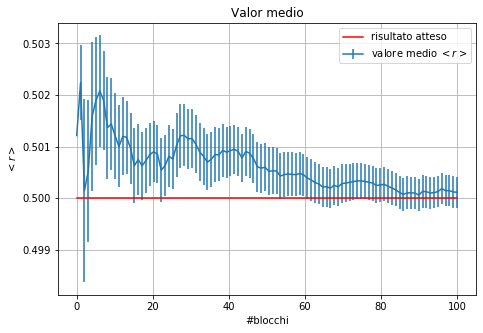

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 5))

#importo i risultati del valor medio
ave, err = np.loadtxt('./Files/ave.out', delimiter = '  ', unpack = 'True')

N = 100
x = np.linspace(0,N,N)
y = 0.5*x**0  #valore atteso

plt.errorbar(x, ave, yerr=err, label='valore medio $<r>$') #grafico simulazione
plt.plot(x,y, color='red', label='risultato atteso') #grafico risultato atteso
plt.title('Valor medio')
plt.xlabel('#blocchi')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)

2. <span style='color:blue'> **Varianza** </span> della successione $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ e  <span style='color:blue'> **relativa incertezza** </span> corrispondente alla deviazione standard dalla media per la stima del momento centrale secondo. In modo analogo al caso precedente determino il momento centrale secondo della distribuzione di valori casuali e la relativa incertezza in modo progressivo sui valori casuali suddivisi in $N$ blocchi di $L$ elementi ciascuno. Innanzitutto determino i valori medi sui singoli blocchi:
$$ r_i = \frac{1}{L}\sum_{j=1}^L \left( x_j-\frac{1}{2} \right)^2 \quad \quad r_i^2 = \left[ \frac{1}{L}\sum_{j=1}^L \left( x_j-\frac{1}{2} \right)^2 \right]^2  \,,$$
quindi ottengo i valori medi progressivi calcolati estendendo progressivamente i blocchi considerati al variare di $i=1,2,..,N$:
$$ \langle r^2 \rangle = \frac{1}{N} \sum_{i=1}^N r^2_i \quad \quad \langle r\rangle^2 = \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \,.$$
Posso quindi stimare l'incertezza statistica relativa al valore medio determinato su $N$ blocchi attraverso la seguente equazione:
    $$\frac{\sigma}{\sqrt{N-1}} = \sqrt{\frac{1}{N-1} \left[ \langle r^2 \rangle - \langle r\rangle^2  \right]} \,.$$

Riporto il grafico del valore medio $\left( \langle r\rangle - \frac{1}{2} \right)^2 - \frac{1}{12}$ con la relativa incertezza $\sigma$ come funzione del numero di valori casuali su cui sono state effettuate le somme progressive. Poichè ciascun blocco è composto da $L$ numeri casuali, al variare di $N$ il totale di numeri utilizzati è pari a $N \times L$.

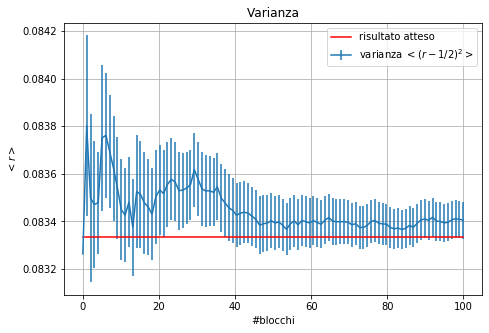

In [2]:
plt.figure(figsize=(7.5, 5))

#importo i risultati della varianza
var, err = np.loadtxt('./Files/var.out', delimiter = '  ', unpack = 'True')

N = 100
x = np.linspace(0,N,N)
y = 1/12*x**0   #valore atteso

plt.errorbar(x, var, yerr=err, label='varianza $<(r-1/2)^2>$') #grafico simulazione
plt.plot(x,y, color='red', label='risultato atteso') #grafico risultato atteso
plt.title('Varianza')
plt.xlabel('#blocchi')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)

3. **<span style='color:blue'> Test del  $\chi^2$ </span>** per verificare che la probabilità con cui engono estratti i valori, in ogni fase dell'estrazione, sia compatibilie con la probabilità di una distribuzione uniforme. Suddivido l'intervallo [0,1] in $M$ sottointervalli e considero $n=10^4$ valori casuali estratti in modo uniforme sull'intervallo [0,1] dall'algoritmo di generazione di numeri pseudocasuali. Ipotizzando una distribuzione uniforme, mi aspetto di osservare $n/M$ valori in ciascun sottointervallo. Indicando con $O_j$ i valori che effettivamente osservati nel $j$-esimo sottointervallo determino il $\chi^2$ come:
$$\chi^2 = \sum_{i=1}^M \frac{\left( O_i - n/M \right)^2}{n/M} \,.$$ Ripetendo il medesimo calcolo per insiemi di $n$ valori casuali generati successivamente dall'algoritmo, ottengo $N=10^2$ stime del $\chi^2$.

Riporto il grafico del $\chi^2$ in funzione dell'intervallo $i$-esimo di valori casuali rispetto al quale è stato calcolato.

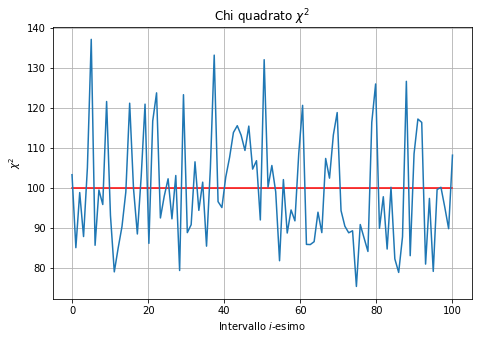

In [3]:
plt.figure(figsize=(7.5, 5))

#importo i risultati del chi quadrato
chi2 = np.loadtxt('./Files/chi.out', delimiter = '  ', unpack = 'True')

N = 100
x = np.linspace(0,N,N)
y = 100*x**0   #valore atteso

plt.plot(x,y, color='red') #grafico risultato atteso
plt.plot(x,chi2) #grafico chi quadro
plt.title("Chi quadrato $\chi^2$")
plt.xlabel('Intervallo $i$-esimo')
plt.ylabel('$\chi^2$')
plt.grid(True)

### Exercise 01.2

Sfruttando il metodo dell'**inversione della funzione cumulativa** aggiungo le seguenti distribuzioni di probabilità al generatore di numeri casuali:

- Distribuzione **<font color='red'>esponenziale</font>** $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$. A partire da una variabile casuale $y$ uniforme sull'intervallo $[0,1)$ otteniamo la variabile casuale $x$ distribuita esponenzialmente tramite la seguente equazione:
$$ x = -\frac{1}{\lambda} \ln \left( 1-y \right) \,.$$

- Distribuzione di **<font color='red'>Cauchy-Lorentz</font>** $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$. A partire da una variabile casuale $y$ uniforme sull'intervallo $[0,1)$ ottengo la variabile casuale $x$ con distribuzione di probabilità Lorentziana tramite la seguente equazione:
$$ x = \mu + \Gamma \tan \left[\pi \left(y-\frac{1}{2}\right) \right] $$

Generando valori casuali $x_i$ distribuiti in modo uniforme, esponenziale e secondo la distribuzione di Lorentz, posso calcolare la media $S_N$ di $N=1,2,10,100$ valori casuali:
$$S_N = \frac{1}{N} \sum_{i=1}^N x_i \quad N=1,2,10,100 \,. $$
Per ciascuna distribuzione e per ciascun valore di $N$ determino $M=10^4$ valori di $S_N$ e costruisco i rispettivi istogrammi in modo da comprendere il comportamento del generatore di numeri pseudocasuali.

1. Numeri casuali con <font color='blue'>**densità di probabilità uniforme**</font>. Riporto qui i quattro istogrammi ottenuti dalla grandezza $S_N$ al variare di $N=1,2,10,100$.

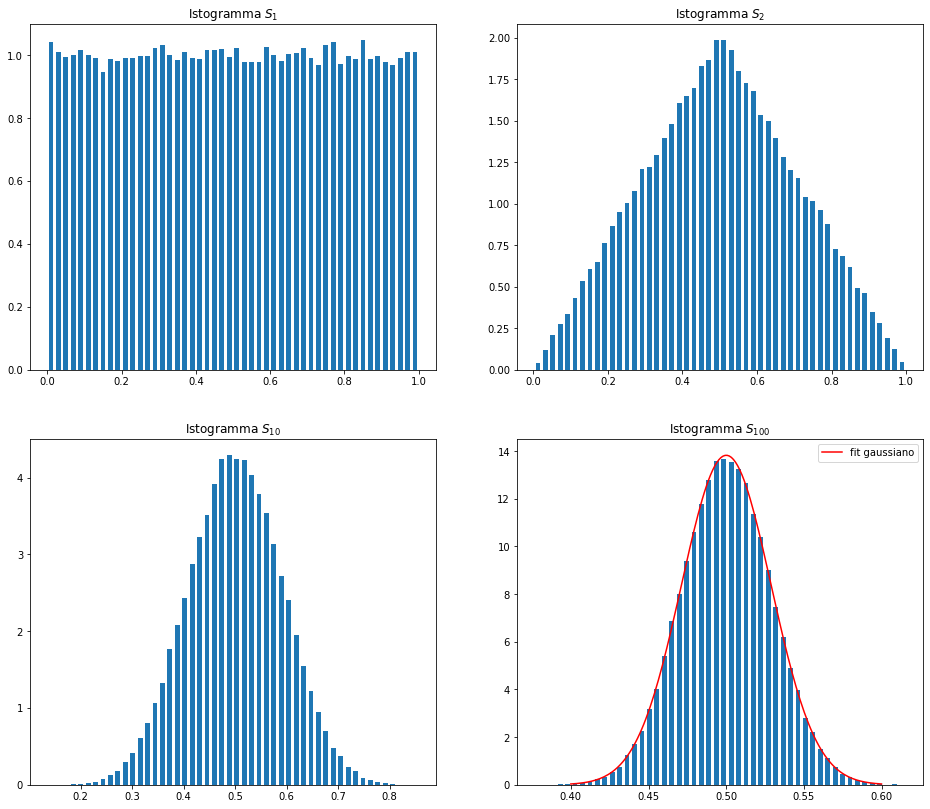

In [42]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import norm

#importo i dati relativi all'istogramma uniforme
S1, S2, S10, S100 = np.loadtxt('./Files/SNstand.out', delimiter = '  ', unpack = 'True')

mu, sigma = norm.fit(S100)  #ottengo mu, sigma dal fit dei dati
x = np.linspace(0.4, 0.6, 150, endpoint=True)
y = norm.pdf(x, mu, sigma)   #gaussiana media=mu, varianza=sigma

plt.figure(figsize=(16, 14))

plt.subplot(221)
plt.hist(S1, bins=50, rwidth=0.65, density=True) #istogramma N=1
plt.title("Istogramma $S_1$")

plt.subplot(222)
plt.hist(S2, bins=50, rwidth=0.65, density=True) #istogramma N=2
plt.title("Istogramma $S_2$")

plt.subplot(223)
plt.hist(S10, bins=50, rwidth=0.65, density=True) #istogramma N=10
plt.title("Istogramma $S_{10}$")

plt.subplot(224)
plt.hist(S100, bins=50, rwidth=0.65, density=True) #istogramma N=100
plt.plot(x,y, color='red', label='fit gaussiano') #fit con la gaussiana
plt.title("Istogramma $S_{100}$")
plt.legend()

#plt.suptitle('Istogrammi normalizzati $S_N$')
plt.show()

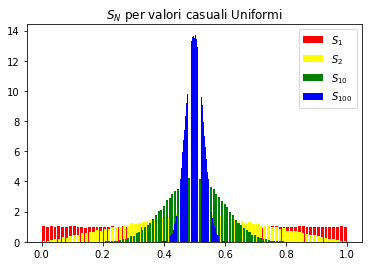

In [43]:
#istogrammi normalizzati al variare di N=1,2,10,100
plt.hist(S1,   bins=80, rwidth=0.75, color='red', label='$S_1$', density=True)     #N=1
plt.hist(S2,   bins=80, rwidth=0.75, color='yellow', label='$S_2$', density=True)  #N=2
plt.hist(S10,  bins=80, rwidth=0.75, color='green', label='$S_{10}$', density=True)  #N=10
plt.hist(S100, bins=80, rwidth=0.75, color='blue', label='$S_{100}$', density=True)  #N=100

plt.title("$S_N$ per valori casuali Uniformi")
plt.legend(loc='upper right')
plt.show()

Il grafico dell'istogramma relativo a $N=100$ può essere fittato con una curva gaussiana. Riporto qui il grafico relativo a tale fit in cui la gaussiana ha parametri $\mu=0.5000$ e $\sigma=0.0289$ ottenuti dall'interpolazione dei dati.

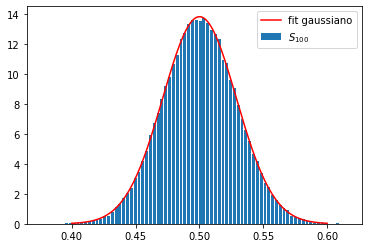

In [44]:
from scipy.stats import norm

mu, sigma = norm.fit(S100)  #ottengo mu, sigma dal fit dei dati
x = np.linspace(0.4, 0.6, 150, endpoint=True)
y = norm.pdf(x, mu, sigma)   #gaussiana media=mu, varianza=sigma

plt.hist(S100, bins=80, rwidth=0.75, label='$S_{100}$', density=True)  #istogramma normalizzato
plt.plot(x,y, color='red', label='fit gaussiano') #fit con la gaussiana
plt.legend()
plt.show()

2. Numeri casuali con <font color='blue'>**densità di probabilità esponenziale**</font> con $\lambda=1$. Riporto qui i quattro istogrammi ottenuti dalla grandezza $S_N$ al variare di $N=1,2,10,100$.

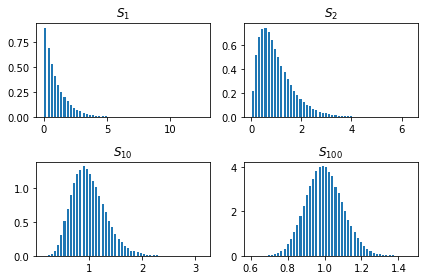

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#importo i dati relativi all'istogramma esponenziale
E1, E2, E10, E100 = np.loadtxt('./Files/SNexpo.out', delimiter = '  ', unpack = 'True')

ax0.hist(E1, bins=50, rwidth=0.65, density=True) #istogramma N=1
ax0.set_title('$S_1$')

ax1.hist(E2, bins=50, rwidth=0.65, density=True) #istogramma N=2
ax1.set_title('$S_2$')

ax2.hist(E10, bins=50, rwidth=0.65, density=True) #istogramma N=10
ax2.set_title('$S_{10}$')

ax3.hist(E100, bins=50, rwidth=0.65, density=True) #istogramma N=100
ax3.set_title('$S_{100}$')

fig.tight_layout()
plt.show()

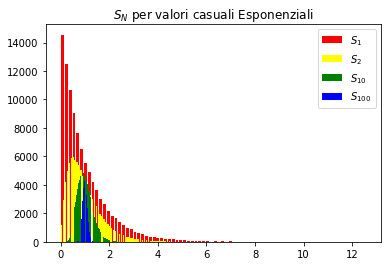

In [46]:
#istogrammi normalizzati al variare di N=1,2,10,100
plt.hist(E1,   bins=80, rwidth=0.75, color='red', label='$S_1$', density=False)     #N=1
plt.hist(E2,   bins=80, rwidth=0.75, color='yellow', label='$S_2$', density=False)  #N=2
plt.hist(E10,  bins=80, rwidth=0.75, color='green', label='$S_{10}$', density=False)  #N=10
plt.hist(E100, bins=80, rwidth=0.75, color='blue', label='$S_{100}$', density=False)  #N=100

plt.title("$S_N$ per valori casuali Esponenziali")
plt.legend(loc='upper right')
plt.show()

Il grafico dell'istogramma relativo a $N=100$ può essere fittato con una curva gaussiana. Riporto qui il grafico relativo a tale fit in cui la gaussiana ha parametri $\mu=1.0005$ e $\sigma=0.0986$ ottenuti dall'interpolazione dei dati.

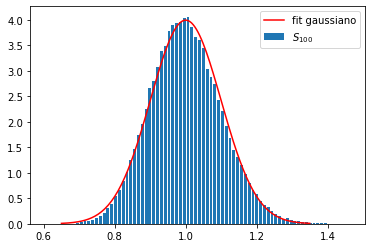

In [47]:
from scipy.stats import norm

mu, sigma = norm.fit(E100)  #ottengo mu, sigma dal fit dei dati
x = np.linspace(0.65, 1.35, 150, endpoint=True)
y = norm.pdf(x, mu, sigma)   #gaussiana media=mu, varianza=sigma

plt.hist(E100, bins=80, rwidth=0.75, label='$S_{100}$', density=True)  #istogramma normalizzato
plt.plot(x,y, color='red', label='fit gaussiano') #fit con la gaussiana
plt.legend()
plt.show()

3. Numeri casuali con <font color='blue'>**densità di probabilità Lorentziana**</font> con $\mu=0$ e $\Gamma=1$. Riporto qui i quattro istogrammi ottenuti dalla grandezza $S_N$ al variare di $N=1,2,10,100$.

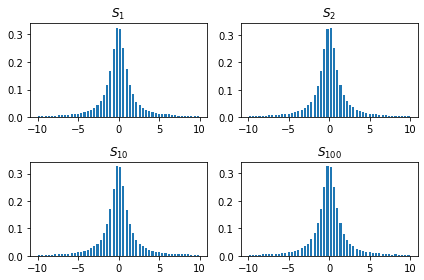

In [48]:
import array as arr

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#importo i dati relativi all'istogramma lorentziano
L1, L2, L10, L100 = np.loadtxt('./Files/SNlorentz.out', delimiter = '  ', unpack = 'True')

nbins = 50  #numero di bins per ogni istogramma
bins_edge = arr.array('d')
for i in range(nbins):
  bins_edge.append(-10+i*20/nbins)
bins_edge.append(10)

lim = 10
ax0.hist(L1, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=1
ax0.set_title('$S_1$')

ax1.hist(L2, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=2
ax1.set_title('$S_2$')

ax2.hist(L10, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=10
ax2.set_title('$S_{10}$')

ax3.hist(L100, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=100
ax3.set_title('$S_{100}$')

fig.tight_layout()
plt.show()

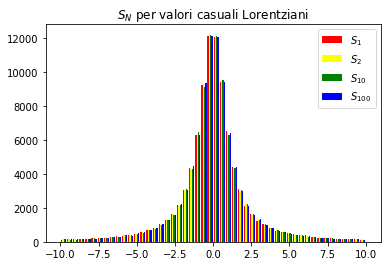

In [52]:
colors = ['red', 'yellow', 'green', 'blue']
labels = ['$S_1$', '$S_2$', '$S_{10}$', '$S_{100}$']

#grafico dei quattro istogrammi insieme
plt.hist( (L1, L2, L10, L100),  bins=bins_edge, rwidth=0.85, color=colors, label=labels, density=False)

plt.title("$S_N$ per valori casuali Lorentziani")
plt.legend()
plt.show()

Il grafico dell'istogramma relativo a  $N=100$  può essere fittato con una distribuzione di Cauchy-Lorentz. Riporto qui il grafico relativo a tale fit in cui la gaussiana ha parametri  $\mu=0.0020$  e  $\Gamma=0.9917$ ottenuti dall'interpolazione dei dati.

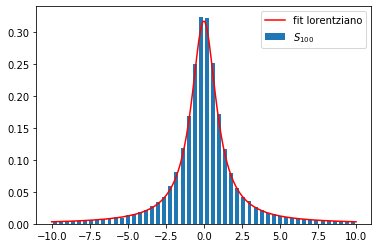

In [54]:
from scipy.stats import cauchy

#importo i dati relativi all'istogramma lorentziano
L1, L2, L10, L100 = np.loadtxt('./Files/SNlorentz.out', delimiter = '  ', unpack = 'True')

mu, Gamma = cauchy.fit(L100)  #ottengo mu, sigma dal fit dei dati
x = np.linspace(-lim, lim, 150, endpoint=True)
y = cauchy.pdf(x, mu, Gamma)   #gaussiana media=mu, varianza=sigma

plt.hist(L100, bins=bins_edge, rwidth=0.65, density=True, label='$S_{100}$')  #istogramma normalizzato
plt.plot(x,y, color='red', label='fit lorentziano')
plt.legend()
plt.show()

### Exercise 01.3

Per stimare il valore di $\pi$ attraverso l'esperimento dell'ago di Buffon, è necessario generare una serie di coppie di valori casuali $(z,\theta)$ che descrivono la posizione di un ago di lunghezza $L$ in un campo in cui le righe si trovano a distanza $d$.
- **z** indica la distanza tra il centro dell'ago e la riga più vicina ad esso. Nella simulazione numerica corrisponde ad un valore generato uniformemente nell'intervallo $(0,\frac{d}{2})$.
- **$\theta$** indica l'angolo acuto formato tra l'ago e le righe del campo. Nella simulazione numerica corrisponde ad un valore generato uniformemente nell'intervallo $[0,\frac{\pi}{2}]$.

![Needle_problem](./Pictures/Needle_problem.png)

Per evitare di usare il valore $\pi$ nella simulazione dell'esperimento di Buffon, è possibile determinare $\theta$ attraverso il seguente procedimento. Inanzitutto produco una coppia di valori casuali $(x,y)$ distribuiti uniformemente nell'intervallo $[0,1]$. Se i valori non soddisfano la condizione $x^2+y^2 \leq 1$ rigetto i due valori e genero una nuova coppia ripetendo il procedimento finchè la condizione non è soddisfatta. Una volta che tale condizione è soddisfatta determino $\theta$ attraverso la seguente equazione:
$$ \theta = \arctan \left( \frac{y}{x} \right) \,.$$
Tale procedimento, che equivale a rigettare i valori che sul piano si trovano all'esterno della circonferenza di raggio unitario, consente di ottenere valori di $\theta$ uniformemente distribuiti nell'intervallo $[0,\frac{\pi}{2}]$.

In questo modello, la **condizione di intersezione** tra l'ago e la più vicina riga del campo è data da:
$$ z \leq \frac{1}{2}L \sin(\theta)  \,.$$
Se simulo $R$ lanci di altrettanti aghi e ottengo che si ha intersezione $M$ volte allora posso determinare il valore di $\pi$ attraverso la seguente equazione:
$$ \pi = \frac{2LR}{Md} \,.$$

In modo analogo ai casi precedenti, suddivido il procedimento in $N$ blocchi in cui determino il valore di $\pi$ utilizzando $R$ aghi per ogni passaggio. In questo modo ottengo $N$ stime di $\pi$ reative a ciascun blocco della simulazione e su questi valori determino le **medie cumulative** considerando progressivamente $N=1,2,..100$ blocchi successivi:
    $$ \langle \pi^2 \rangle = \frac{1}{N} \sum_{i=1}^N \pi^2_i \quad \quad \langle \pi \rangle^2 = \left( \frac{1}{N} \sum_{i=1}^N \pi_i \right)^2 \,.$$
Posso quindi stimare l'incertezza statistica relativa al valore medio determinato su $N$ blocchi come:
    $$\frac{\sigma}{\sqrt{N-1}} = \sqrt{\frac{1}{N-1} \left[ \langle \pi^2 \rangle - \langle \pi \rangle^2  \right]} \,.$$

Riporto qui il grafico del valore medio di $\pi$ determinato tramite le medie progressive al variare del numero di blocchi considerati. Le barre di  errore mostrano l'incertezza statistica associata a ciascuna stima.
Nella simulazione ho utilizzato i seguenti valori:

- $M=10^4$ aghi in ciascun blocco
- $N=100$ blocchi
- $d=0.75$ per la spaziatura tra le righe del campo.
- $L=0.5$ per la lunghezza degli aghi.

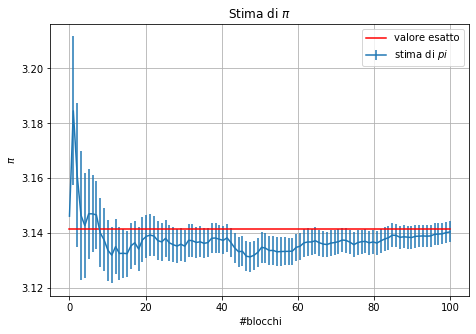

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 5))
pi, err = np.loadtxt('./Files/pi.out', delimiter = '  ', unpack = 'True')

N=100
x = np.linspace(0,N,N)
y = math.pi*x**0 #risultato esatto

plt.errorbar(x, pi, yerr=err, label='stima di $pi$') #grafico valori medi progressivi
plt.plot(x, y, color='red', label='valore esatto') #grafico del risultato esatto

plt.title('Stima di $\pi$')
plt.xlabel('#blocchi')
plt.ylabel('$\pi$')
plt.legend()
plt.grid(True)